Learning Rate vs Loss:
   learning_rate        loss
0       0.000390  89534.3093
1       0.005119  39697.1995
2       0.000039  89560.1775
3       0.000607  89442.7728
4       0.000025  89560.1499
5       0.002966  51439.5356
6       0.000144  89559.9540
7       0.002059  76630.4288
8       0.000248  89555.0359

Average Loss by Optimizer:
optimizer
adam     81027.043317
adamw    39697.199500
sgd      89560.051950
Name: loss, dtype: float64

Average Loss by Loss Function:
loss_fn
l1     80028.66885
mse    76972.97758
Name: loss, dtype: float64


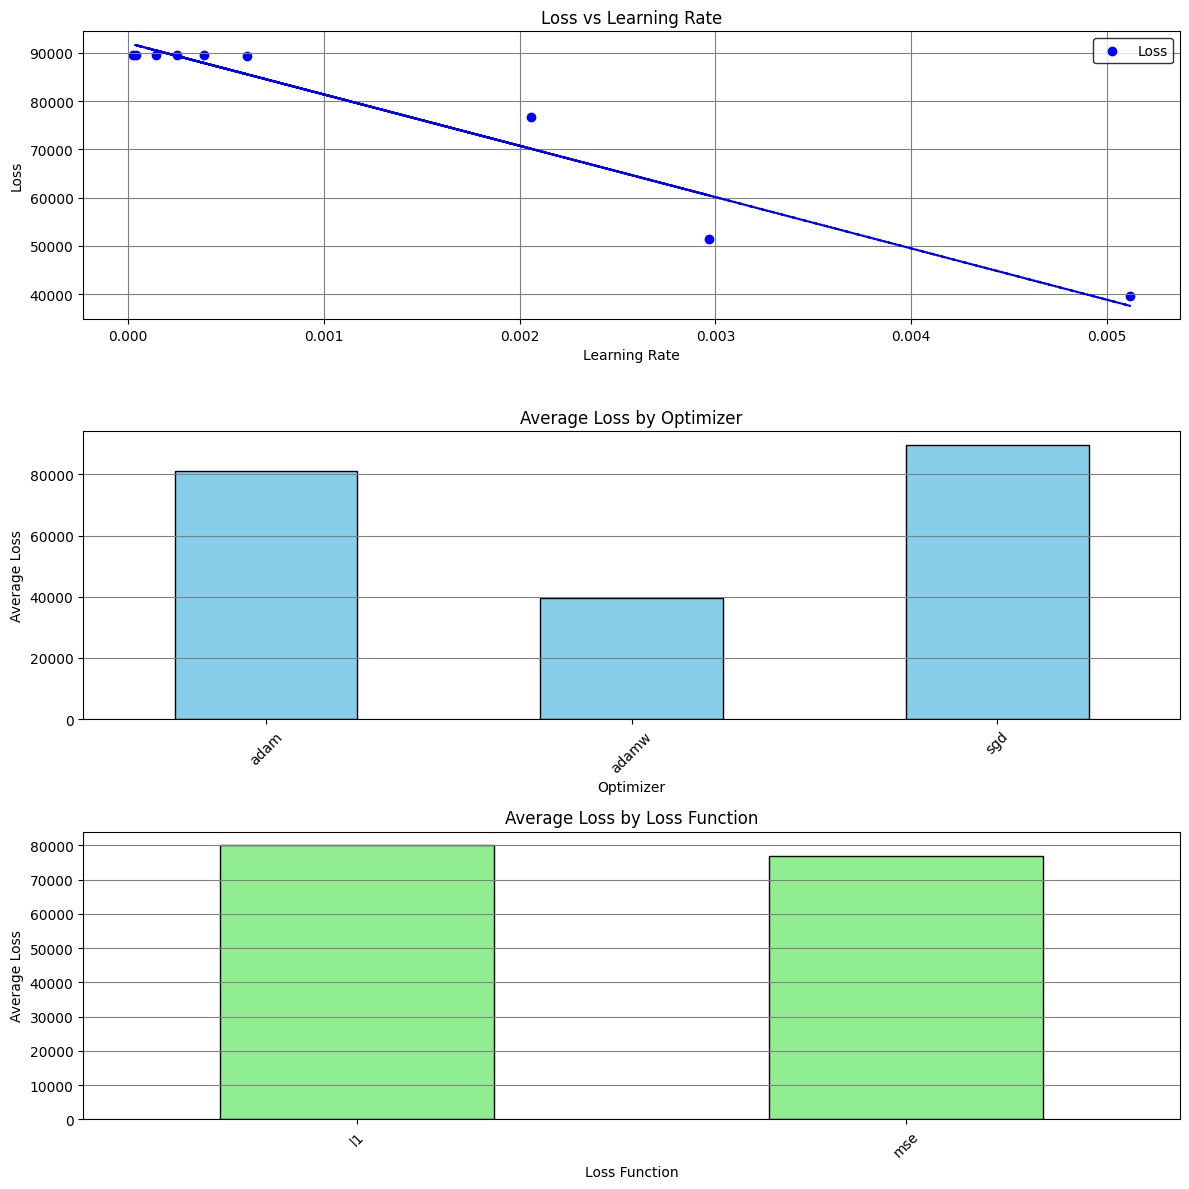

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

data = pd.read_csv("learning_hyperparams.csv")
df = pd.DataFrame(data)

# Grouping by optimizer and loss_function to calculate mean loss
optimizer_avg_loss = df.groupby("optimizer", dropna=False)["loss"].mean()
loss_function_avg_loss = df.groupby("loss_fn", dropna=False)["loss"].mean()

# Function to add linear regression line
def add_regression_line(x, y, color):
    model = LinearRegression()
    x = np.array(x).reshape(-1, 1)
    y = np.array(y)
    model.fit(x, y)
    y_pred = model.predict(x)
    plt.plot(x, y_pred, color=color, linestyle='--')

# Print the values used for plotting
print("Learning Rate vs Loss:")
print(df[["learning_rate", "loss"]])

print("\nAverage Loss by Optimizer:")
print(optimizer_avg_loss)

print("\nAverage Loss by Loss Function:")
print(loss_function_avg_loss)

# Creating the figure with a white background (instead of black)
plt.figure(figsize=(12, 12), facecolor="white")

# Plot 1: Loss vs Learning Rate
plt.subplot(3, 1, 1, facecolor="white")  # Set subplot background to white
plt.scatter(df["learning_rate"], df["loss"], color="blue", label="Loss")
add_regression_line(df["learning_rate"], df["loss"], color="blue")
plt.title("Loss vs Learning Rate", color="black")
plt.xlabel("Learning Rate", color="black")
plt.ylabel("Loss", color="black")
plt.grid(True, color="gray")
plt.legend(facecolor="white", edgecolor="black", labelcolor="black")

# Setting the x and y axis values to black
plt.xticks(color="black")
plt.yticks(color="black")

# Plot 2: Average Loss by Optimizer
plt.subplot(3, 1, 2, facecolor="white")  # Set subplot background to white
ax = optimizer_avg_loss.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Loss by Optimizer", color="black")
plt.xlabel("Optimizer", color="black")
plt.ylabel("Average Loss", color="black")
plt.xticks(rotation=45, color="black")
plt.yticks(color="black")
plt.grid(axis="y", color="gray")

# Plot 3: Average Loss by Loss Function
plt.subplot(3, 1, 3, facecolor="white")  # Set subplot background to white
ax = loss_function_avg_loss.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Average Loss by Loss Function", color="black")
plt.xlabel("Loss Function", color="black")
plt.ylabel("Average Loss", color="black")
plt.xticks(rotation=45, color="black")
plt.yticks(color="black")
plt.grid(axis="y", color="gray")

# Adjust layout
plt.tight_layout()
plt.show()